Interpretation of the columns based on the data provided:
1. **uniqueid**: Identifier for the vehicle (seems consistent, likely only one vehicle's data).
2. **ts**: Timestamp of the data point.
3. **lat**: Latitude coordinate of the vehicle.
4. **lng**: Longitude coordinate of the vehicle.
5. **frequency**: Unclear from the provided data (all zeros in this case).
6. **temperature**: Temperature data.
7. **refuel**: Refuel status (boolean, all false in this case).
8. **odo_distance**: Odometer distance reading.
9. **RAWFUELLEVEL**: Raw fuel level

In [224]:
#importing required liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [225]:
#loading the data file as Excel
df=pd.read_excel("/content/data scientist assignment for 1.5 to 3 years 1.xlsx")

In [226]:
#Displaying the first 5 rows records
df.head()

,uniqueid,ts,lat,lng,frequency,temperature,refuel,odo_distance,RAWFUELLEVEL
0,vehicle_1,2024-01-05 00:00:37.000,25.447653,85.289067,0,0,False,5759704.0,114.81908
1,vehicle_1,2024-01-05 00:01:07.000,25.447653,85.289067,0,0,False,5759704.0,114.81908
2,vehicle_1,2024-01-05 00:01:37.000,25.447653,85.289067,0,0,False,5759704.0,114.81908
3,vehicle_1,2024-01-05 00:01:48.000,25.447653,85.289067,0,0,False,5759704.0,114.81908
4,vehicle_1,2024-01-05 00:02:18.000,25.447653,85.289067,0,0,False,5759704.0,114.81908


In [227]:
#Checking all informations about features like datatype, missing value, no of records etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456349 entries, 0 to 456348
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uniqueid      456349 non-null  object 
 1   ts            456349 non-null  object 
 2   lat           456349 non-null  float64
 3   lng           456349 non-null  float64
 4   frequency     456349 non-null  int64  
 5   temperature   456349 non-null  int64  
 6   refuel        456349 non-null  bool   
 7   odo_distance  456349 non-null  float64
 8   RAWFUELLEVEL  456349 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 28.3+ MB


In [228]:
# Checking no of records and no of features
df.shape

(456349, 9)

In [229]:
for i in df.columns:
  print(i,df[i].nunique())

uniqueid 1
ts 456349
lat 52740
lng 123780
frequency 1
temperature 37
refuel 1
odo_distance 199833
RAWFUELLEVEL 2180


In [230]:
#Basic descriptions of numerical features
df.describe()

,lat,lng,frequency,temperature,odo_distance,RAWFUELLEVEL
count,456349.000000,456349.000000,456349.0,456349.000000,4.563490e+05,456349.000000
mean,25.464207,85.590943,0.0,24.016753,1.541509e+07,79.355041
std,0.038473,0.261588,0.0,7.164161,7.415849e+06,67.261187
min,25.332278,84.759122,0.0,0.000000,5.759704e+06,0.000000
25%,25.440312,85.412958,0.0,20.000000,8.740790e+06,0.000000
50%,25.454257,85.721707,0.0,24.000000,1.275901e+07,95.526277
75%,25.479857,85.798605,0.0,28.000000,2.348187e+07,137.990463
max,25.584962,85.821828,0.0,128.000000,2.824274e+07,228.650924


In [231]:
#Basic descriptions of all features
df.describe(include="all")

,uniqueid,ts,lat,lng,frequency,temperature,refuel,odo_distance,RAWFUELLEVEL
count,456349,456349,456349.000000,456349.000000,456349.0,456349.000000,456349,4.563490e+05,456349.000000
unique,1,456349,NaN,NaN,NaN,NaN,1,NaN,NaN
top,vehicle_1,2024-01-05 00:00:37.000,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,456349,1,NaN,NaN,NaN,NaN,456349,NaN,NaN
mean,NaN,NaN,25.464207,85.590943,0.0,24.016753,NaN,1.541509e+07,79.355041
std,NaN,NaN,0.038473,0.261588,0.0,7.164161,NaN,7.415849e+06,67.261187
min,NaN,NaN,25.332278,84.759122,0.0,0.000000,NaN,5.759704e+06,0.000000
25%,NaN,NaN,25.440312,85.412958,0.0,20.000000,NaN,8.740790e+06,0.000000
50%,NaN,NaN,25.454257,85.721707,0.0,24.000000,NaN,1.275901e+07,95.526277
75%,NaN,NaN,25.479857,85.798605,0.0,28.000000,NaN,2.348187e+07,137.990463


In [232]:
print(df.uniqueid.value_counts(),"\n\n")
print(df.frequency.value_counts(),"\n\n")
print(df.refuel.value_counts(),"\n\n")

uniqueid
vehicle_1    456349
Name: count, dtype: int64 


frequency
0    456349
Name: count, dtype: int64 


refuel
False    456349
Name: count, dtype: int64 




In [233]:
# Uniqueid, refuel and Frequency feature does not provide any insights for data so droping this feature
df.drop(['uniqueid','refuel','frequency'],axis=1,inplace=True)


In [234]:
#After removing Featurs ['uniqueid','refuel','frequency']
df.columns

Index(['ts', 'lat', 'lng', 'temperature', 'odo_distance', 'RAWFUELLEVEL'], dtype='object')

In [235]:
df.dtypes


ts               object
lat             float64
lng             float64
temperature       int64
odo_distance    float64
RAWFUELLEVEL    float64
dtype: object

# ts is catagoricl datatype and others are numeric

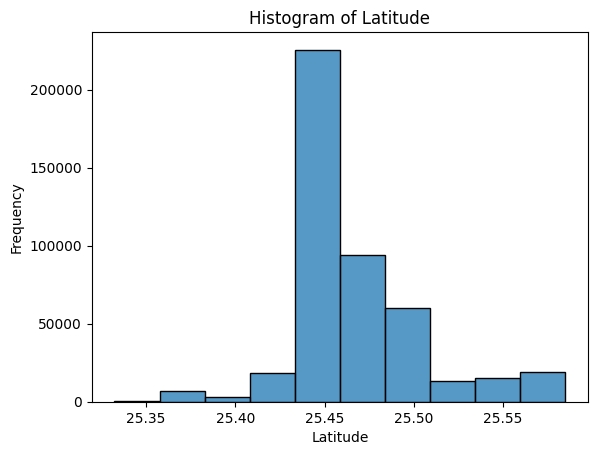

In [236]:
# prompt: generate hist plot fot lat

sns.histplot(data=df, x="lat", bins=10)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Histogram of Latitude")
plt.show()


# Vehical runs maximum in beetween 25.45 to 25.50 latitude
# Minimum in 25.35 and 25.40 latitude

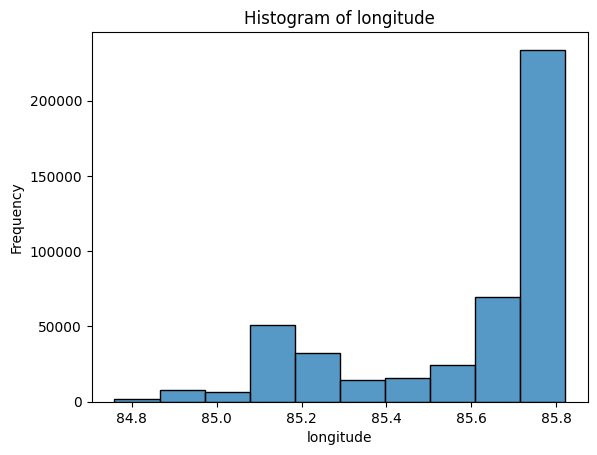

In [237]:
sns.histplot(data=df, x="lng", bins=10)
plt.xlabel("longitude")
plt.ylabel("Frequency")
plt.title("Histogram of longitude")
plt.show()


# Vehical runs maximum in 85.8 lognitude
# Minimum in 84.8 lognitude

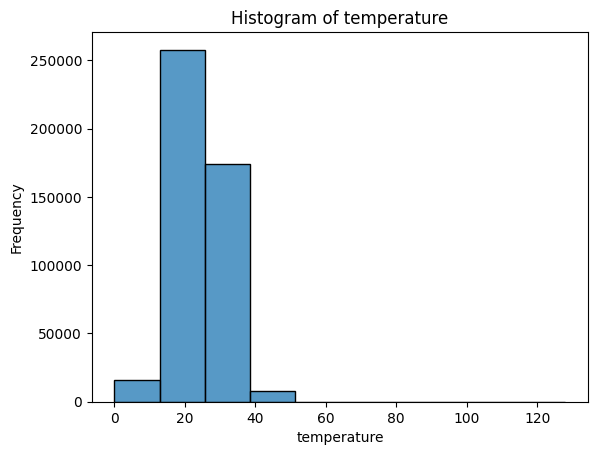

In [238]:
sns.histplot(data=df, x="temperature", bins=10)
plt.xlabel("temperature")
plt.ylabel("Frequency")
plt.title("Histogram of temperature")
plt.show()


# Vehical Temprature in between 0 to 50
# Maximum time tempratue is 20

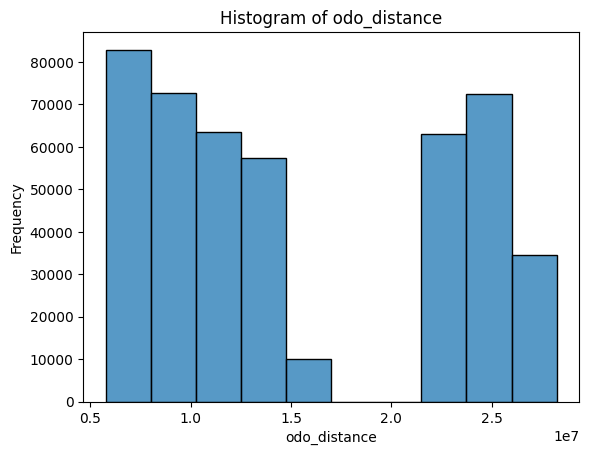

In [239]:
sns.histplot(data=df, x="odo_distance", bins=10)
plt.xlabel("odo_distance")
plt.ylabel("Frequency")
plt.title("Histogram of odo_distance")
plt.show()

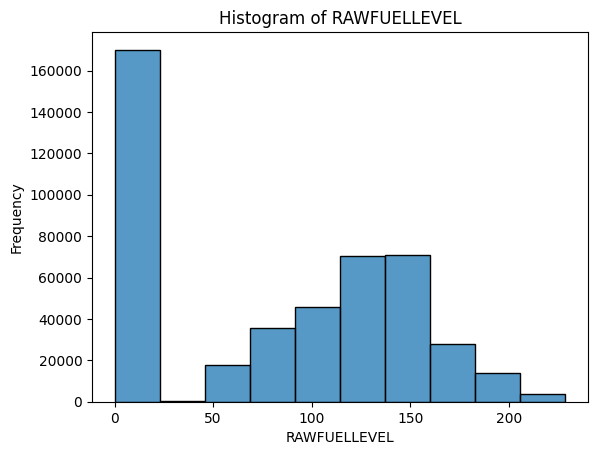

In [240]:
sns.histplot(data=df, x="RAWFUELLEVEL", bins=10)
plt.xlabel("RAWFUELLEVEL")
plt.ylabel("Frequency")
plt.title("Histogram of RAWFUELLEVEL")
plt.show()

# Vehical Rawfuellevel is 0 which looks odd
# Maximum time Rawfuellevel is beetween 20 to 200


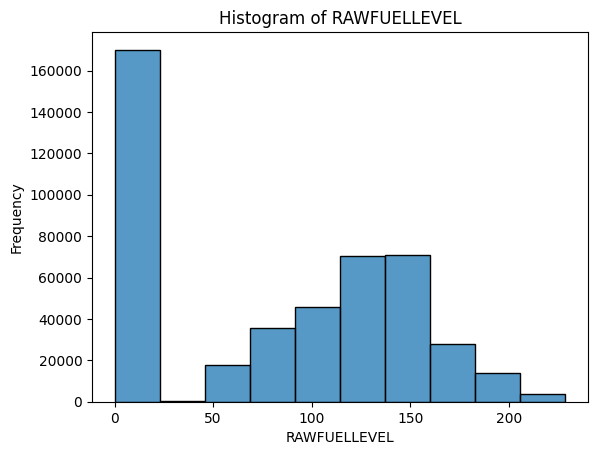

In [241]:
sns.histplot(data=df, x="RAWFUELLEVEL", bins=10)
plt.xlabel("RAWFUELLEVEL")
plt.ylabel("Frequency")
plt.title("Histogram of RAWFUELLEVEL")
plt.show()

# Maximum time RAWFUELLEVEL is 0 which looks odd
# Also, RAWFUELLEVEL is Beetween 50 to 200

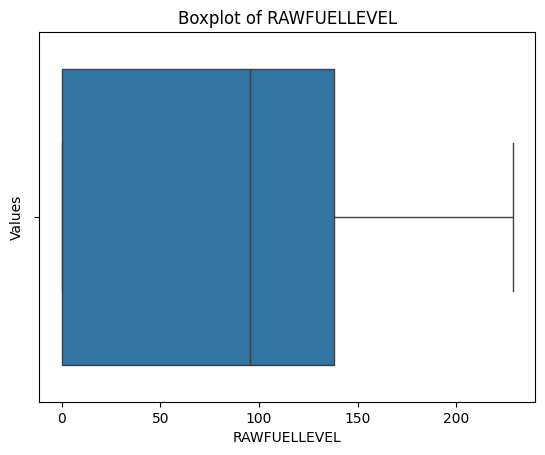

In [242]:
#box plot for RAWFUELLEVEL

sns.boxplot(x = df["RAWFUELLEVEL"])
plt.xlabel("RAWFUELLEVEL")
plt.ylabel("Values")
plt.title("Boxplot of RAWFUELLEVEL")
plt.show()


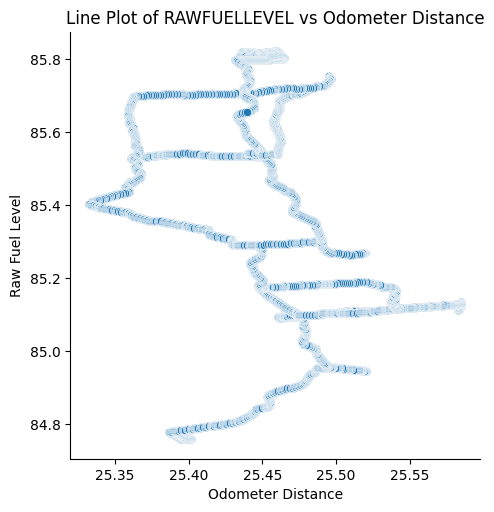

In [243]:
# prompt: line plot between RAWFUELLEVEL and odo_distance

sns.relplot(data=df, x="lat", y="lng")
plt.xlabel("Odometer Distance")
plt.ylabel("Raw Fuel Level")
plt.title("Line Plot of RAWFUELLEVEL vs Odometer Distance")
plt.show()


# Vehical running pattern

In [244]:
#sorting data frame df by ascending order on odo_distance

df = df.sort_values(['odo_distance'], ascending=True)

In [245]:
#converting ts column to datetime data type
df['ts'] = pd.to_datetime(df['ts'])

In [246]:
df.head()

,ts,lat,lng,temperature,odo_distance,RAWFUELLEVEL
0,2024-01-05 00:00:37,25.447653,85.289067,0,5759704.0,114.81908
1,2024-01-05 00:01:07,25.447653,85.289067,0,5759704.0,114.81908
2,2024-01-05 00:01:37,25.447653,85.289067,0,5759704.0,114.81908
3,2024-01-05 00:01:48,25.447653,85.289067,0,5759704.0,114.81908
4,2024-01-05 00:02:18,25.447653,85.289067,0,5759704.0,114.81908


In [247]:
df.dtypes

ts              datetime64[ns]
lat                    float64
lng                    float64
temperature              int64
odo_distance           float64
RAWFUELLEVEL           float64
dtype: object

# After converting the data type of ts is now datetime

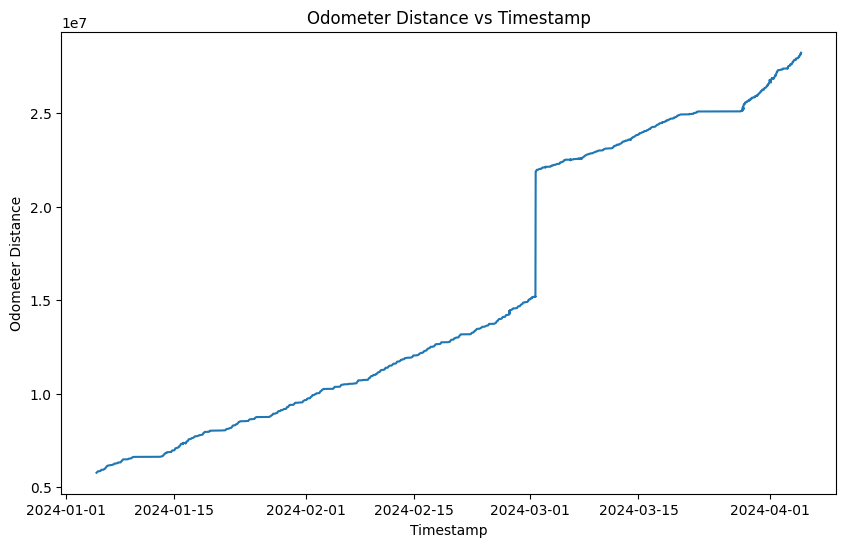

In [248]:
#line Plot for df dataframe ts on x axis and RAWFUELLEVEL on y axis

plt.figure(figsize=(10, 6))
sns.lineplot(x="ts", y="odo_distance", data=df)
plt.xlabel("Timestamp")
plt.ylabel("Odometer Distance")
plt.title("Odometer Distance vs Timestamp")
plt.show()


# ODO METER ghraph shows some discrapncy in between on 01-03-2024 odo meter rises maximum there is a possiblity that some data record are not in data file or something changes done in odo meter.


# **We will check the 0s value record in dataframe df**

In [249]:
df_with_zero_rawfuellevel = df[df['RAWFUELLEVEL'] == 0]

In [250]:
df_without_zero_rawfuellevel = df[df['RAWFUELLEVEL'] >= 1]

In [251]:
print("All Records in Data Frame df is :",df.shape[0],'\n')
print("Data Frame df with zero 'rawfuellevel' :",df_with_zero_rawfuellevel.shape[0],'\n')
print("Data Frame df without zero 'rawfuellevel' :",df_without_zero_rawfuellevel.shape[0],'\n')

All Records in Data Frame df is : 456349 

Data Frame df with zero 'rawfuellevel' : 170060 

Data Frame df without zero 'rawfuellevel' : 286289 



# **Visualization after removing the 0's value record from the data frame**

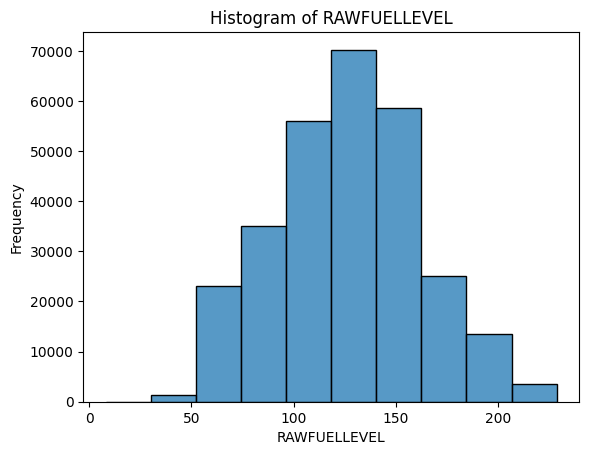

In [252]:
sns.histplot(data=df_without_zero_rawfuellevel, x="RAWFUELLEVEL", bins=10)
plt.xlabel("RAWFUELLEVEL")
plt.ylabel("Frequency")
plt.title("Histogram of RAWFUELLEVEL")
plt.show()

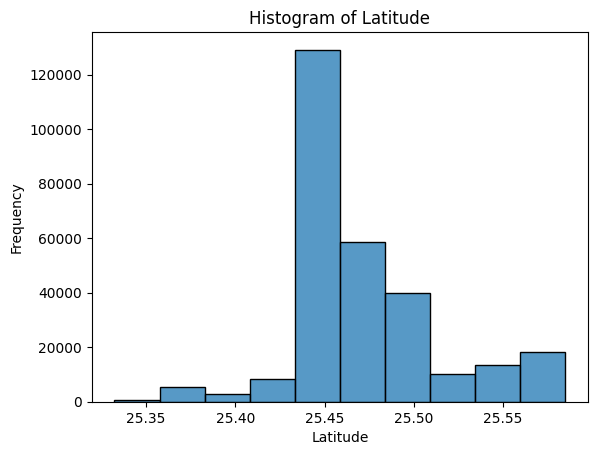

In [253]:
# prompt: generate hist plot fot lat

sns.histplot(data=df_without_zero_rawfuellevel, x="lat", bins=10)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Histogram of Latitude")
plt.show()

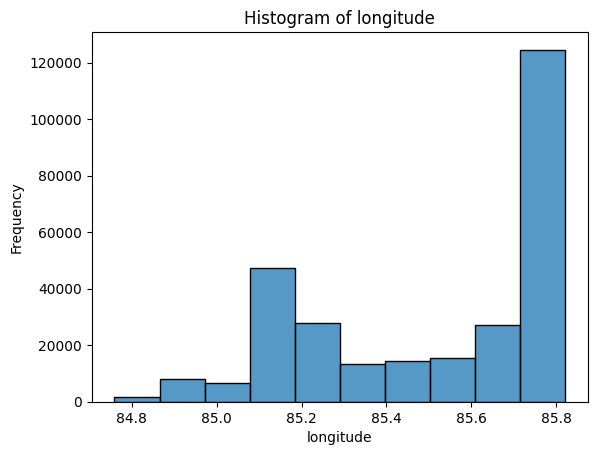

In [254]:
# prompt: generate hist plot fot lat

sns.histplot(data=df_without_zero_rawfuellevel, x="lng", bins=10)
plt.xlabel("longitude")
plt.ylabel("Frequency")
plt.title("Histogram of longitude")
plt.show()

# **We will predict the value for 0s rawfuellevel which is correct or not.**

In [255]:
#importing train test liabraryes and linearRegression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df_without_zero_rawfuellevel[['lat', 'lng', 'temperature', 'odo_distance']]
y = df_without_zero_rawfuellevel['RAWFUELLEVEL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_train, y_train)
print("R-squared score For Train Data:", score)


# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score  For Test Data:", score)


R-squared score For Train Data: 0.2655179321110184
R-squared score  For Test Data: 0.2584427661572549


In [256]:
# prompt: perform polynomial regrassion on data frame df_without_zero_rawfuellevel

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)

# Transform the features
X_poly = poly_features.fit_transform(X_train)

# Train the linear regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Evaluate the model
score = model.score(X_poly, y_train)
print("R-squared score:", score)


R-squared score: 0.31025896541045106


# So Linear model is not a good model to predict the RAWFUELLEVEL so droping a 0s value records for RAWFUELLEVEL then will try to predict the Anomaly in data set



In [257]:
columns_to_check = ['lat', 'lng', 'temperature','odo_distance', 'RAWFUELLEVEL']
df_deduplicated = df_without_zero_rawfuellevel.drop_duplicates(subset=columns_to_check)
df_deduplicated.head()


,ts,lat,lng,temperature,odo_distance,RAWFUELLEVEL
0,2024-01-05 00:00:37,25.447653,85.289067,0,5759704.0,114.819080
5,2024-01-05 00:02:37,25.447618,85.289045,0,5759708.5,114.819080
7,2024-01-05 00:02:49,25.447628,85.288922,0,5759721.0,114.819080
8,2024-01-05 00:02:59,25.447628,85.288922,0,5759721.0,114.100562
9,2024-01-05 00:03:09,25.447665,85.288653,0,5759748.0,113.941014


In [258]:
df_deduplicated.count()

ts              158572
lat             158572
lng             158572
temperature     158572
odo_distance    158572
RAWFUELLEVEL    158572
dtype: int64

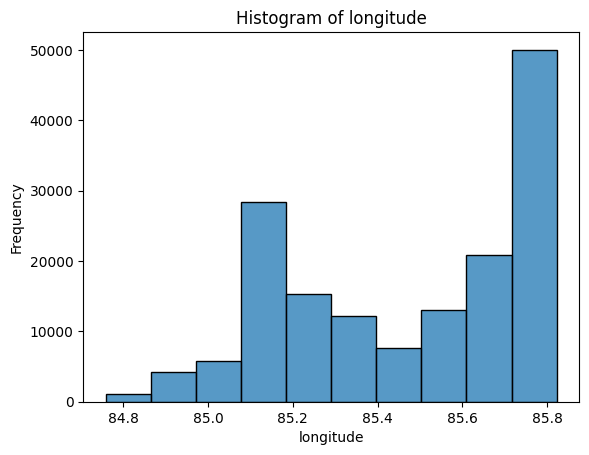

In [259]:
# prompt: generate hist plot fot longitude

sns.histplot(data=df_deduplicated, x="lng", bins=10)
plt.xlabel("longitude")
plt.ylabel("Frequency")
plt.title("Histogram of longitude")
plt.show()

# It looks like vehical runs maximum on longitude 85.8 and 85.2

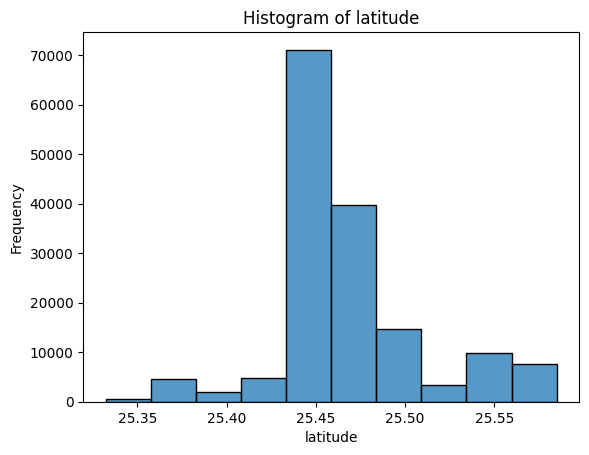

In [260]:
# prompt: generate hist plot fot latitude

sns.histplot(data=df_deduplicated, x="lat", bins=10)
plt.xlabel("latitude")
plt.ylabel("Frequency")
plt.title("Histogram of latitude")
plt.show()

# Vehical runs maximum in beetween 25.45 to 25.50 latitude


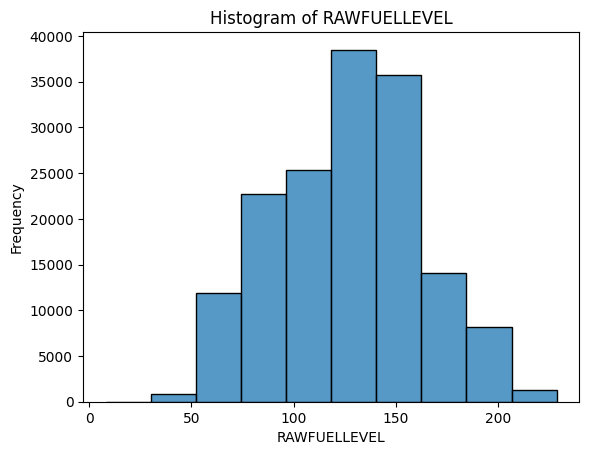

In [261]:
# prompt: generate hist plot fot RAWFUELLEVEL

sns.histplot(data=df_deduplicated, x="RAWFUELLEVEL", bins=10)
plt.xlabel("RAWFUELLEVEL")
plt.ylabel("Frequency")
plt.title("Histogram of RAWFUELLEVEL")
plt.show()

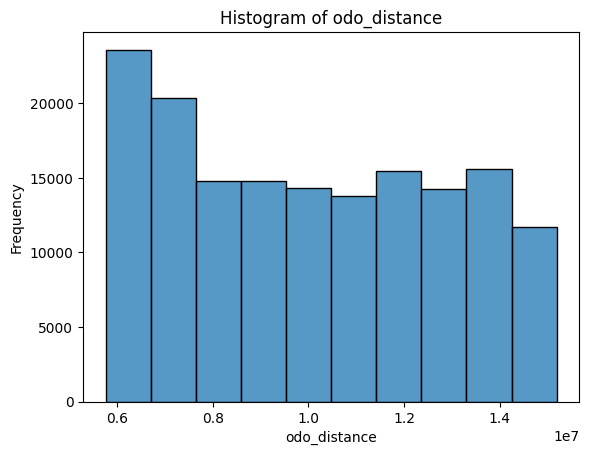

In [262]:
# prompt: generate hist plot fot odo_distance

sns.histplot(data=df_deduplicated, x="odo_distance", bins=10)
plt.xlabel("odo_distance")
plt.ylabel("Frequency")
plt.title("Histogram of odo_distance")
plt.show()

In [263]:
#converting ts column to datetime
df_deduplicated['ts'] = pd.to_datetime(df_deduplicated['ts'])


In [264]:
# prompt: create day, month, year, hr, mint from  ts column in df_deduplicated
# df['Day'] = df['ts'].dt.day
# df['month'] = df['ts'].dt.month
# df['year'] = df['ts'].dt.year
# df['minute'] = df['ts'].dt.minute + df['ts'].dt.hour * 60
# df['hours'] = df['ts'].dt.minute/60 + df['ts'].dt.hour
# df['Day Name'] = df['ts'].dt.day_name()

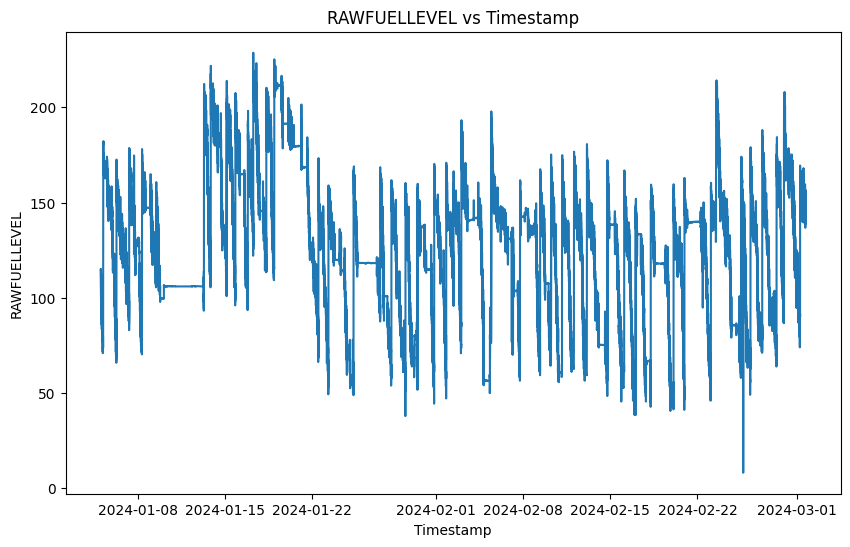

In [265]:
#line Plot for df dataframe ts on x axis and RAWFUELLEVEL on y axis

plt.figure(figsize=(10, 6))
sns.lineplot(x="ts", y="RAWFUELLEVEL", data=df_deduplicated)
plt.xlabel("Timestamp")
plt.ylabel("RAWFUELLEVEL")
plt.title("RAWFUELLEVEL vs Timestamp")
plt.show()


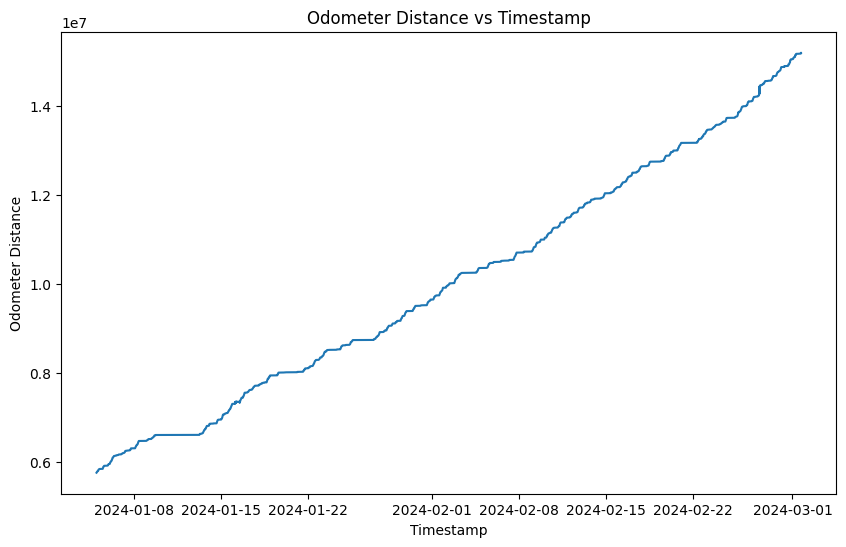

In [266]:
#line Plot for df dataframe ts on x axis and RAWFUELLEVEL on y axis

plt.figure(figsize=(10, 6))
sns.lineplot(x="ts", y="odo_distance", data=df_deduplicated)
plt.xlabel("Timestamp")
plt.ylabel("Odometer Distance")
plt.title("Odometer Distance vs Timestamp")
plt.show()


In [267]:
#sns.pairplot(df)

In [268]:
df_deduplicated.isnull().sum()


ts              0
lat             0
lng             0
temperature     0
odo_distance    0
RAWFUELLEVEL    0
dtype: int64

In [269]:
df_before_resampled = df_deduplicated.set_index('ts')
df_before_resampled.head(5)

,lat,lng,temperature,odo_distance,RAWFUELLEVEL
ts,,,,,
2024-01-05 00:00:37,25.447653,85.289067,0,5759704.0,114.819080
2024-01-05 00:02:37,25.447618,85.289045,0,5759708.5,114.819080
2024-01-05 00:02:49,25.447628,85.288922,0,5759721.0,114.819080
2024-01-05 00:02:59,25.447628,85.288922,0,5759721.0,114.100562
2024-01-05 00:03:09,25.447665,85.288653,0,5759748.0,113.941014


#**1. Anomaly detection model to for data frame df_resampled using all feature and records**

In [270]:
# Anomaly detection model to for data frame df_resampled using all feature and records

from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.05)
model.fit(df_before_resampled)

df_before_resampled['Pilferages']=model.predict(df_before_resampled)


In [271]:
df_before_resampled['Pilferages'].value_counts()

Pilferages
 1    150643
-1      7929
Name: count, dtype: int64

# There are -1 and 1 values in anamoly column which indicates -1 means refuels and pilferages and 1 means normal data


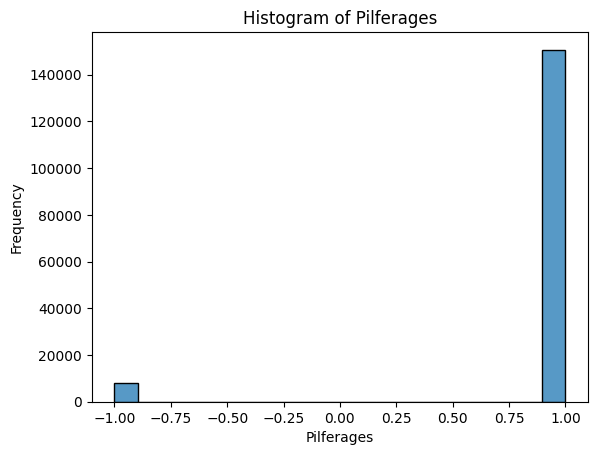

In [272]:
sns.histplot(df_before_resampled['Pilferages'])
plt.xlabel("Pilferages")
plt.ylabel("Frequency")
plt.title("Histogram of Pilferages")
plt.show()

# Pilferages Graph

In [273]:
#df_before_resampled.to_csv("/content/df_before_resampled.csv")

# **2.  Re sampling the data on Hourly basis**

In [274]:
# resample the dataframe df on Day wise
df_resampled = df_deduplicated.set_index('ts').resample('H').mean()
df_resampled.head(5)


,lat,lng,temperature,odo_distance,RAWFUELLEVEL
ts,,,,,
2024-01-05 00:00:00,25.451772,85.185627,0.0,5.770499e+06,103.193924
2024-01-05 01:00:00,25.481957,85.023461,0.0,5.787564e+06,92.373496
2024-01-05 02:00:00,25.497198,84.956637,0.0,5.795940e+06,89.271942
2024-01-05 03:00:00,25.470706,85.093111,0.0,5.811943e+06,85.563284
2024-01-05 04:00:00,25.458553,85.287138,0.0,5.833365e+06,147.126734


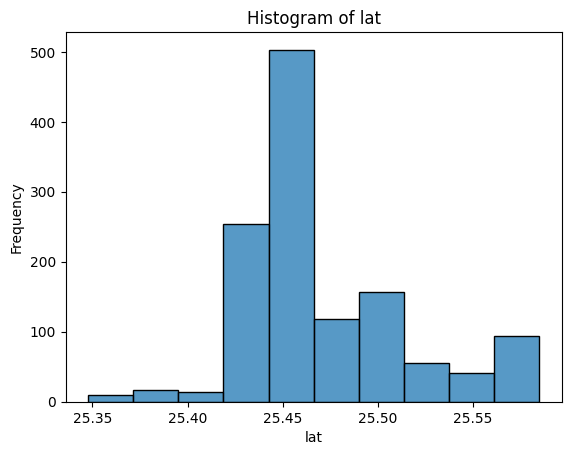

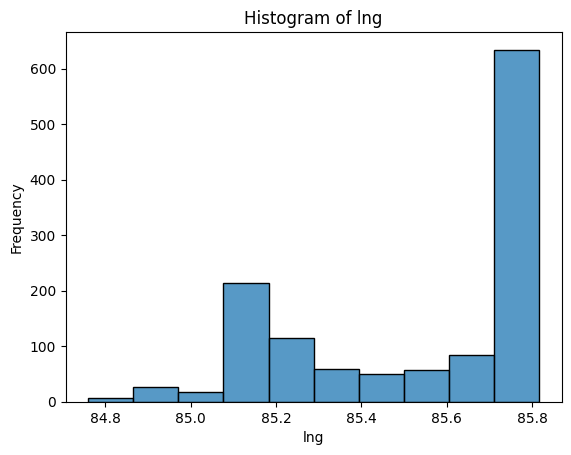

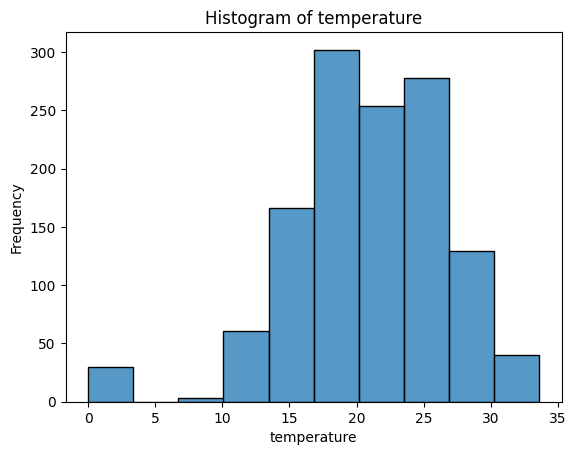

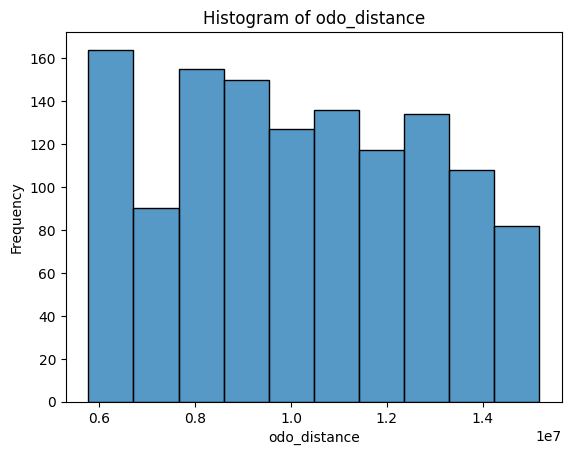

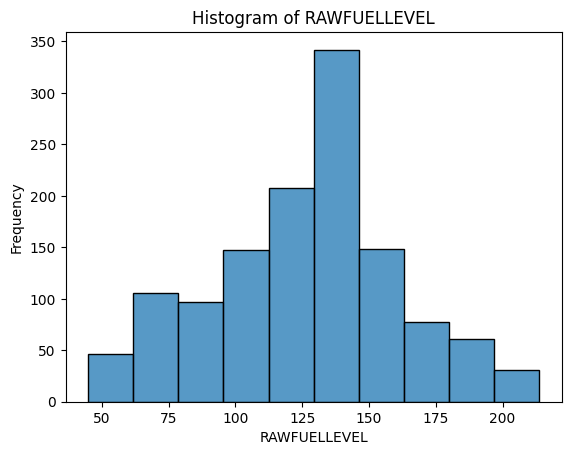

In [275]:
# Histogram for all feature
columns_to_check = ['lat', 'lng', 'temperature','odo_distance', 'RAWFUELLEVEL']
for col in columns_to_check:
  sns.histplot(data=df_resampled, x=col, bins=10)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")
  plt.show()
  print("\n\n")


# Visualization for all the feature after re-sampling looks good

In [276]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1361 entries, 2024-01-05 00:00:00 to 2024-03-01 16:00:00
Freq: H
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           1263 non-null   float64
 1   lng           1263 non-null   float64
 2   temperature   1263 non-null   float64
 3   odo_distance  1263 non-null   float64
 4   RAWFUELLEVEL  1263 non-null   float64
dtypes: float64(5)
memory usage: 63.8 KB


In [277]:
#df_resampled.to_csv("/content/df_resampled.csv")

In [278]:
df_resampled.isnull().sum()

lat             98
lng             98
temperature     98
odo_distance    98
RAWFUELLEVEL    98
dtype: int64

In [279]:
df_resampled.dropna(inplace=True)

#**3. Anomaly model after re-sampling on hourly basis**

In [280]:
# prompt: generate anomaly detection model to for data frame df_resampled using all feature to target feature RAWFUELLEVEL

from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(df_resampled)

df_resampled['Pilferages']=model.predict(df_resampled)



In [281]:
df_resampled['Pilferages'].value_counts()

Pilferages
 1    1136
-1     127
Name: count, dtype: int64

# Model implimentation on real time indicater

In [282]:

data = {
  "lat": [25.43633,25.43637,25.43635],
  "lng": [85.652580,85.652585,85.652595],
  "temperature":[30,32,33],
  "odo_distance":[28242742,28242776,28242785],
  "RAWFUELLEVEL":[300,120,555]
}

df_features = pd.DataFrame(data)




In [283]:
df_features['Pilferages']=model.predict(df_features)

In [284]:
df_features.head()

,lat,lng,temperature,odo_distance,RAWFUELLEVEL,Pilferages
0,25.43633,85.652580,30,28242742,300,-1
1,25.43637,85.652585,32,28242776,120,-1
2,25.43635,85.652595,33,28242785,555,-1


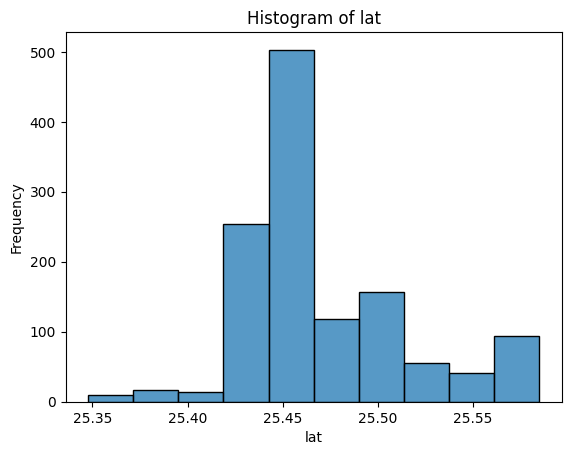

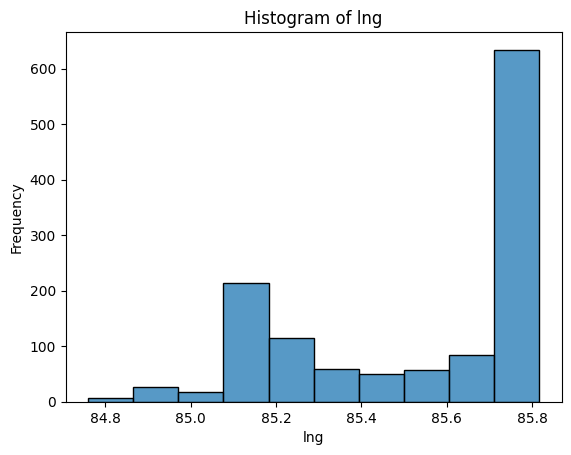

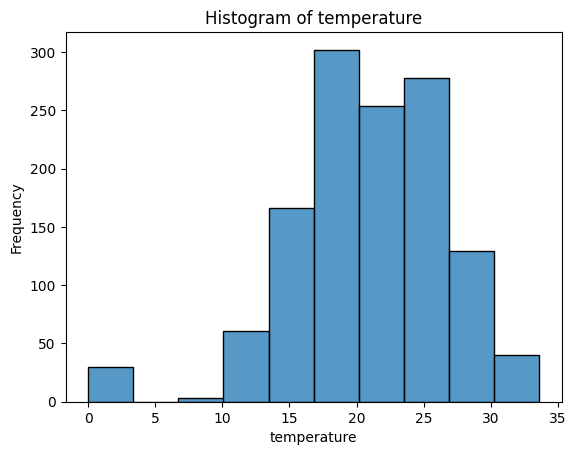

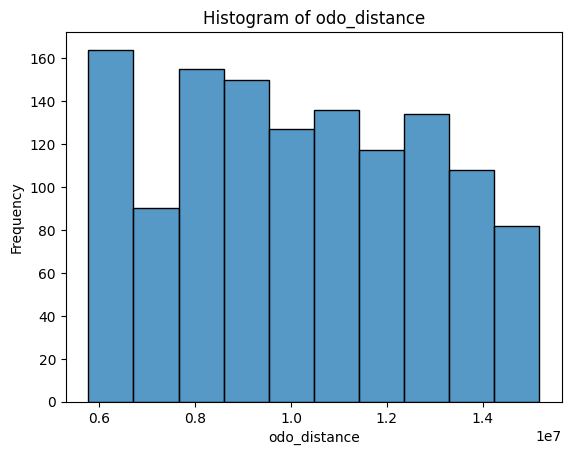

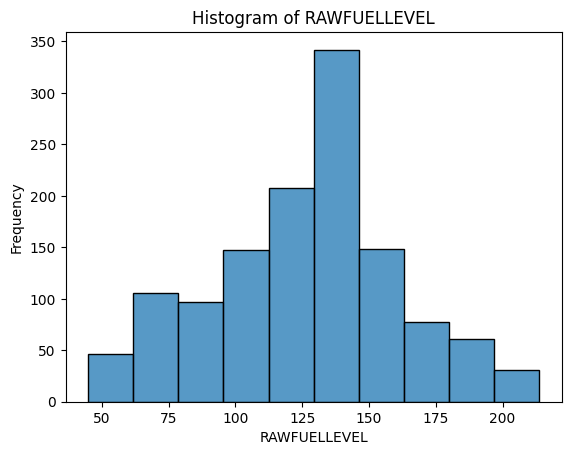

In [285]:
# Histogram for all feature
columns_to_check = ['lat', 'lng', 'temperature','odo_distance', 'RAWFUELLEVEL']
for col in columns_to_check:
  sns.histplot(data=df_resampled, x=col, bins=10)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")
  plt.show()
  print("\n\n")

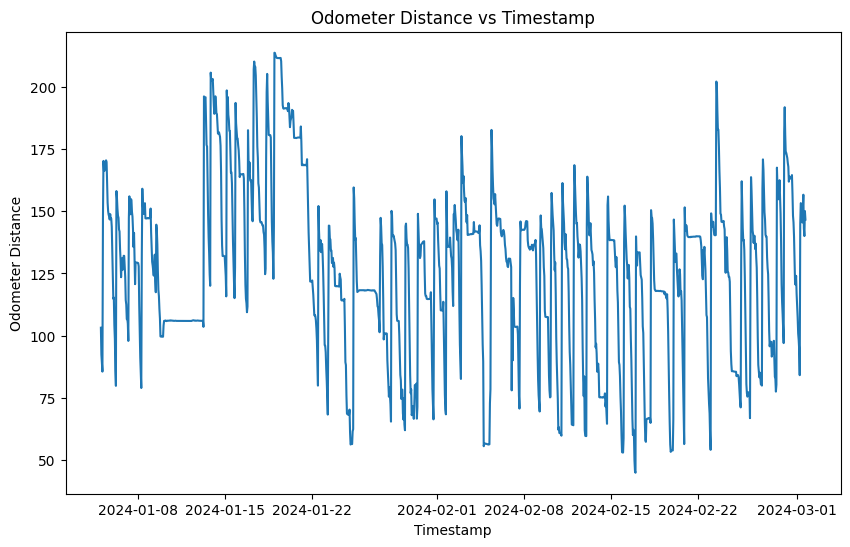

In [286]:
#line Plot for df dataframe ts on x axis and RAWFUELLEVEL on y axis

plt.figure(figsize=(10, 6))
# sns.lineplot(x="ts", y="odo_distance", data=df)
sns.lineplot(x="ts", y="RAWFUELLEVEL", data=df_resampled)
plt.xlabel("Timestamp")
plt.ylabel("Odometer Distance")
plt.title("Odometer Distance vs Timestamp")
plt.show()


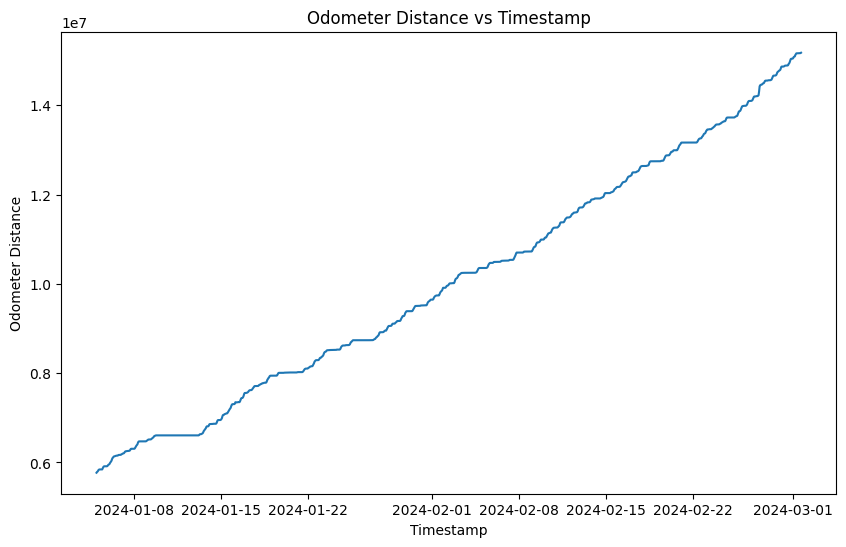

In [287]:
#line Plot for df dataframe ts on x axis and RAWFUELLEVEL on y axis

plt.figure(figsize=(10, 6))
sns.lineplot(x="ts", y="odo_distance", data=df_resampled)
plt.xlabel("Timestamp")
plt.ylabel("Odometer Distance")
plt.title("Odometer Distance vs Timestamp")
plt.show()


In [288]:
df_resampled.head()

,lat,lng,temperature,odo_distance,RAWFUELLEVEL,Pilferages
ts,,,,,,
2024-01-05 00:00:00,25.451772,85.185627,0.0,5.770499e+06,103.193924,-1
2024-01-05 01:00:00,25.481957,85.023461,0.0,5.787564e+06,92.373496,-1
2024-01-05 02:00:00,25.497198,84.956637,0.0,5.795940e+06,89.271942,-1
2024-01-05 03:00:00,25.470706,85.093111,0.0,5.811943e+06,85.563284,-1
2024-01-05 04:00:00,25.458553,85.287138,0.0,5.833365e+06,147.126734,-1


In [289]:
df_resampled=df_resampled.reset_index()

In [290]:
df_resampled.head()

,ts,lat,lng,temperature,odo_distance,RAWFUELLEVEL,Pilferages
0,2024-01-05 00:00:00,25.451772,85.185627,0.0,5.770499e+06,103.193924,-1
1,2024-01-05 01:00:00,25.481957,85.023461,0.0,5.787564e+06,92.373496,-1
2,2024-01-05 02:00:00,25.497198,84.956637,0.0,5.795940e+06,89.271942,-1
3,2024-01-05 03:00:00,25.470706,85.093111,0.0,5.811943e+06,85.563284,-1
4,2024-01-05 04:00:00,25.458553,85.287138,0.0,5.833365e+06,147.126734,-1


(1263, 3)
(1263,)


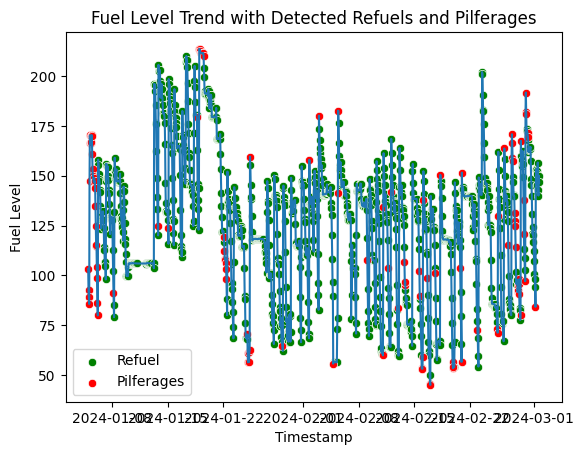

In [292]:
# prompt: Visualization for fuel level trend, which involves detected refuels and anomoly with their event of time.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with only relevant columns
df_visualization = df_resampled[['ts','RAWFUELLEVEL', 'Pilferages']]

print(df_visualization.shape)


# Convert the index to a datetime format
df_visualization.index = pd.to_datetime(df_visualization ['ts'])

print(df_visualization.index.shape)
# Create a line plot of the fuel level trend

sns.lineplot(data=df_visualization, x=df_visualization.index, y='RAWFUELLEVEL')

# Add points for detected refuels
sns.scatterplot(
    data=df_visualization[df_visualization['Pilferages'] == 1],
    x=df_visualization.index[df_visualization['Pilferages'] == 1],
    y='RAWFUELLEVEL',
    color='green',
    label='Refuel'
)


# Add points for detected anomalies
sns.scatterplot(
    data=df_visualization[df_visualization['Pilferages'] == -1],
    x=df_visualization.index[df_visualization['Pilferages'] == -1],
    y='RAWFUELLEVEL',
    color='red',
    label='Pilferages'
)

# Set the title and axis labels
plt.title('Fuel Level Trend with Detected Refuels and Pilferages')
plt.xlabel('Timestamp')
plt.ylabel('Fuel Level')

# Add a legend
plt.legend()

# Show the plot
plt.show()

